## Polynomial Regression with various degrees 

Weights for  0  degree [0.02041638]
Train Loss for  0  degree 0.6731752865838925
Test loss for  0  degree 0.6674124679554678


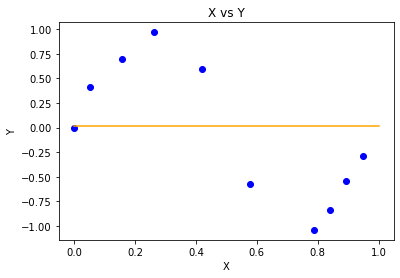

Weights for  1  degree [ 0.98680411 -1.91268987]
Train Loss for  1  degree 0.46411706693782007
Test loss for  1  degree 0.49406271849558986


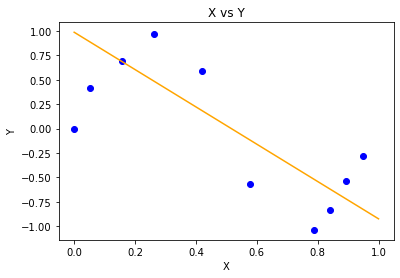

Weights for  2  degree [ 0.98116418 -2.07996223  0.27636004]
Train Loss for  2  degree 0.4556148736840785
Test loss for  2  degree 0.49196227897034434


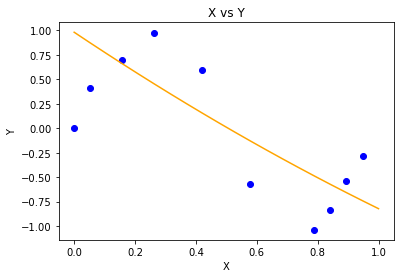

Weights for  3  degree [ 1.18331302 -2.51039433 -0.86779194  1.64388042]
Train Loss for  3  degree 0.3871492843934072
Test loss for  3  degree 0.5302656212592867


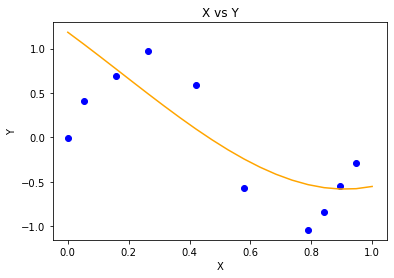

Weights for  4  degree [ 1.29412604 -2.41142711 -1.57377715  0.30832452  2.05007154]
Train Loss for  4  degree 0.321508889849062
Test loss for  4  degree 0.5461019433410967


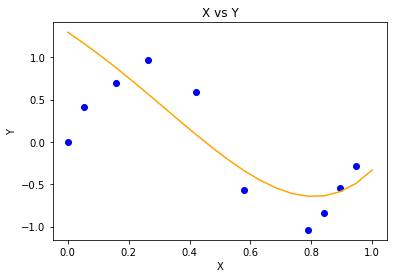

Weights for  5  degree [ 1.30299692 -2.09795642 -1.82961928 -0.46649493  0.89632671  1.98657393]
Train Loss for  5  degree 0.2752281704619516
Test loss for  5  degree 0.5356745305026555


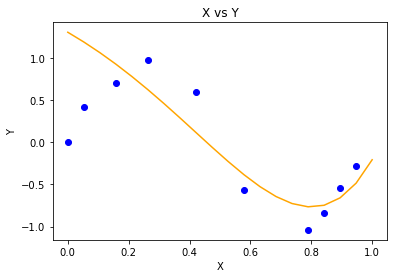

Weights for  6  degree [ 1.26778077 -1.79007557 -1.86416004 -0.86060029  0.22200583  1.10879586
  1.77324889]
Train Loss for  6  degree 0.24276416036019643
Test loss for  6  degree 0.5186875664343636


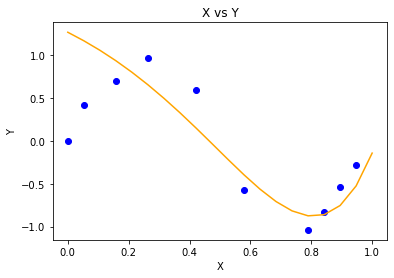

Weights for  7  degree [ 1.22372863 -1.54945533 -1.81798865 -1.05038913 -0.1629927   0.57683394
  1.13435076  1.53792434]
Train Loss for  7  degree 0.22003890284735472
Test loss for  7  degree 0.507677640343136


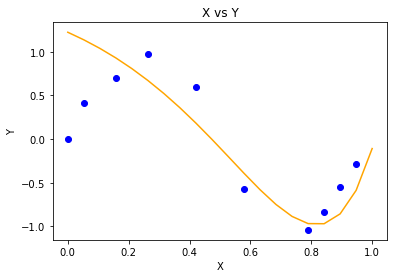

Weights for  8  degree [ 1.18390224 -1.3746213  -1.75164449 -1.13798407 -0.38529768  0.24976931
  0.72938335  1.07615722  1.3222844 ]
Train Loss for  8  degree 0.20457953380004923
Test loss for  8  degree 0.5061032630983706


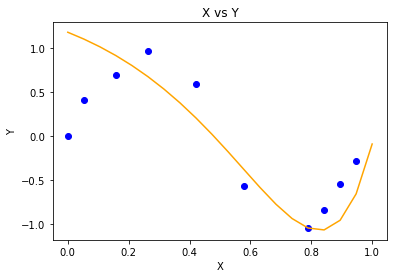

Weights for  9  degree [ 1.1513213  -1.25001052 -1.68722645 -1.17538542 -0.51665995  0.04317655
  0.46576873  0.77039354  0.98574967  1.13680436]
Train Loss for  9  degree 0.19439570368244105
Test loss for  9  degree 0.5129995425208861


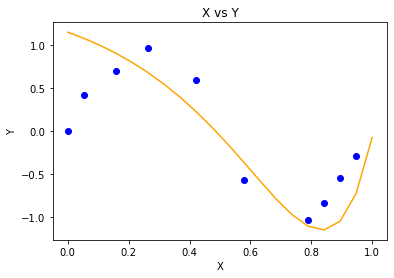

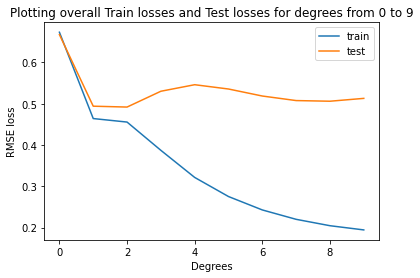

For 0 degree the weights are
       W0
---------
0.0204164
For 1 degree the weights are
      W0        W1
--------  --------
0.986804  -1.91269
For 3 degree the weights are
     W0        W1         W2       W3
-------  --------  ---------  -------
1.18331  -2.51039  -0.867792  1.64388
For 9 degree the weights are
     W0        W1        W2        W3        W4         W5        W6        W7       W8      W9
-------  --------  --------  --------  --------  ---------  --------  --------  -------  ------
1.15132  -1.25001  -1.68723  -1.17539  -0.51666  0.0431766  0.465769  0.770394  0.98575  1.1368


In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from tabulate import tabulate
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        
        
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = (h - self.Y)
            #print(error)
            
            
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error )
            
        
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=20
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=20)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    degree0weights=[]
    degree1weights=[]
    degree3weights=[]
    degree9weights=[]
    
    for i in range(10):
        model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 15000 )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," degree",model.W) 
        if i==0 :
            degree0weights.append(model.W)
        if i==1 :
            degree1weights.append(model.W)
        if i==3 :
            degree3weights.append(model.W)
        if i==9 :
            degree9weights.append(model.W)
        print("Train Loss for ",i," degree",model.train_loss)
        
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
        
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," degree",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X_test, Y_test, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
         
       
    
    
    
    plt.plot(TrainTracker , label="train")
    plt.plot(TestTracker , label="test")
    plt.legend()
    plt.title( 'Plotting overall Train losses and Test losses for degrees from 0 to 9' )
    plt.xlabel( 'Degrees' )
    plt.ylabel( 'RMSE loss' )
    plt.show()
    
    print("For 0 degree the weights are")
    print(tabulate(degree0weights, headers=["W0"]))
    print("For 1 degree the weights are")
    print(tabulate(degree1weights, headers=["W0","W1"]))
    print("For 3 degree the weights are")
    print(tabulate(degree3weights, headers=["W0","W1","W2","W3","W4"]))
    print("For 9 degree the weights are")
    print(tabulate(degree9weights, headers=["W0","W1","W2","W3","W4","W5","W6","W7","W8","W9"]))
    

    
    
    
if __name__ == "__main__" :
     
    main()

## Increasing data points

Weights for  0  degree [-0.10732952]
Train Loss for  0  degree 0.674914152706435
Test loss for  0  degree 0.7447005273894653


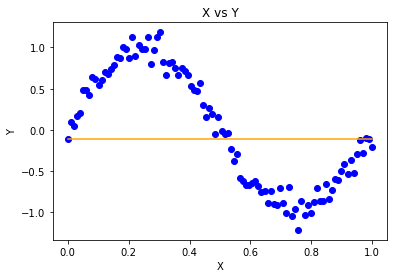

Weights for  1  degree [ 0.80914308 -1.68959544]
Train Loss for  1  degree 0.4700282435449166
Test loss for  1  degree 0.4399684652853002


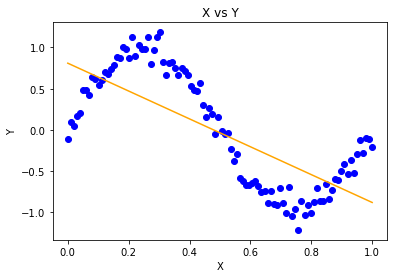

Weights for  2  degree [ 0.73827038 -1.38866474 -0.24717876]
Train Loss for  2  degree 0.47352907192047816
Test loss for  2  degree 0.44149698216257555


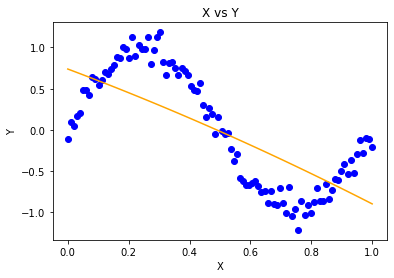

Weights for  3  degree [ 0.84406363 -1.66586875 -0.89885239  1.00316225]
Train Loss for  3  degree 0.44656511507582547
Test loss for  3  degree 0.43355072011805956


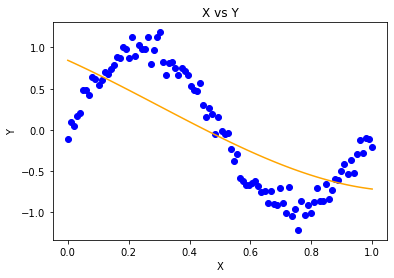

Weights for  4  degree [ 0.9268538  -1.63182986 -1.43466897  0.09410847  1.54754813]
Train Loss for  4  degree 0.40808289477019083
Test loss for  4  degree 0.409164236228798


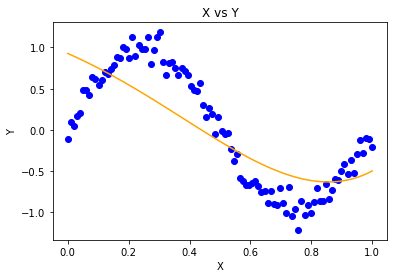

Weights for  5  degree [ 0.95279816 -1.42800331 -1.68484055 -0.50909233  0.70598237  1.66016119]
Train Loss for  5  degree 0.37384446715344516
Test loss for  5  degree 0.3813861511413633


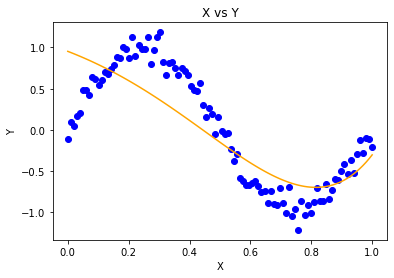

Weights for  6  degree [ 0.94321824 -1.2028662  -1.75036298 -0.84323982  0.16954572  0.97814902
  1.56209676]
Train Loss for  6  degree 0.34879830974427417
Test loss for  6  degree 0.3574947555944024


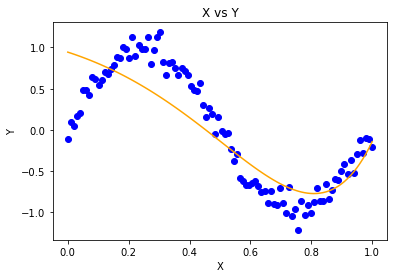

Weights for  7  degree [ 0.91914267 -1.01810455 -1.72609447 -1.00215166 -0.1431366   0.54526449
  1.03732044  1.37004075]
Train Loss for  7  degree 0.33385928792014113
Test loss for  7  degree 0.34036007037009564


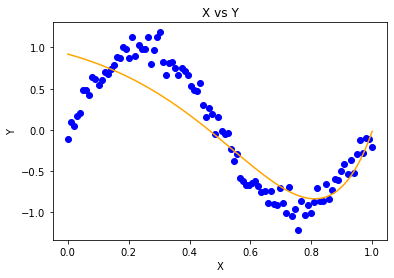

Weights for  8  degree [ 0.8927724  -0.88718739 -1.66852967 -1.05968438 -0.3096586   0.28651774
  0.70351209  0.97606638  1.143727  ]
Train Loss for  8  degree 0.327394147622625
Test loss for  8  degree 0.3299786651966246


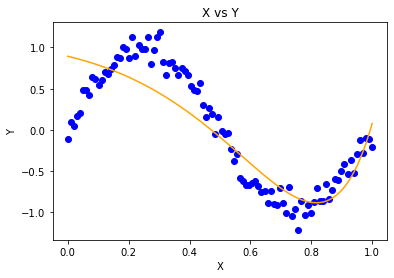

Weights for  9  degree [ 0.86981763 -0.80447726 -1.60662105 -1.06399839 -0.38679448  0.14246426
  0.50171992  0.72578238  0.85322577  0.91473049]
Train Loss for  9  degree 0.32652162794239575
Test loss for  9  degree 0.32487630102101156


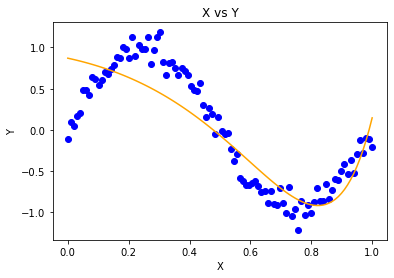

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
       
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
         
            error = (h - self.Y)
            
            
            
            # update weights
         
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error )
            
        
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
      
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=100
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=100)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    for i in range(10):
        model = PolynomailRegression( degree = i, learning_rate = 0.01, iterations = 15000 )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," degree",model.W) 
        print("Train Loss for ",i," degree",model.train_loss)
        
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
      
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," degree",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
    
    
    
 
if __name__ == "__main__" :
     
    main()

## Applying Regularization.

Weights for  1  penalty [-1.07529109e+74 -1.07719693e+74 -1.07813189e+74 -1.07872272e+74
 -1.07913581e+74 -1.07944329e+74 -1.07968254e+74 -1.07987502e+74
 -1.08003389e+74 -1.08016772e+74]
Train Loss for  1  penalty 4.3454728933438464e+74
Test loss for  1  penalty 3.617848537508444e+74


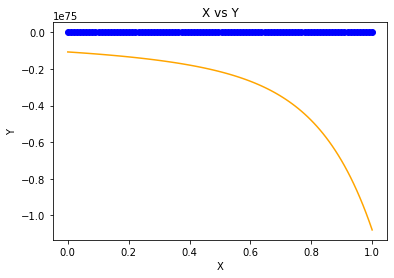

Weights for  0.1  penalty [-2.96093149e+14 -3.01565866e+14 -3.04262016e+14 -3.05969714e+14
 -3.07165603e+14 -3.08056871e+14 -3.08751081e+14 -3.09310004e+14
 -3.09771664e+14 -3.10160736e+14]
Train Loss for  0.1  penalty 1226773259796513.8
Test loss for  0.1  penalty 1019571802579988.6


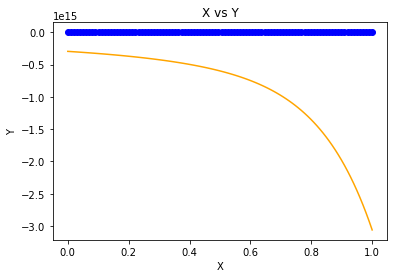

Weights for  0.01  penalty [-0.5452776  -0.80208703 -0.86941265 -0.89445916 -0.90708038 -0.91550005
 -0.92228611 -0.9282983  -0.93383613 -0.93900764]
Train Loss for  0.01  penalty 3.1013811089509025
Test loss for  0.01  penalty 2.5485815410504498


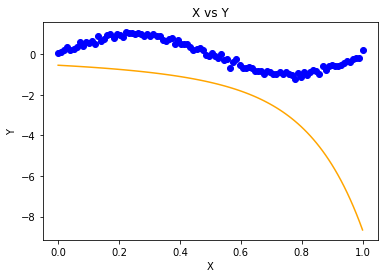

Weights for  0.001  penalty [ 0.00150276 -0.120261   -0.11826971 -0.09845954 -0.079191   -0.06356914
 -0.05145896 -0.04214705 -0.03495362 -0.02934477]
Train Loss for  0.001  penalty 0.5921321611417107
Test loss for  0.001  penalty 0.6743105720608545


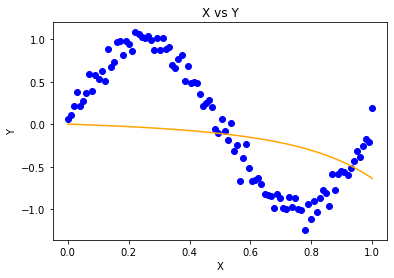

Weights for  0.0001  penalty [ 0.00649976 -0.11236585 -0.1088563  -0.08805353 -0.06807435 -0.05191392
 -0.0393787  -0.02972099 -0.02223953 -0.01638627]
Train Loss for  0.0001  penalty 0.5945893919543406
Test loss for  0.0001  penalty 0.6778000616568134


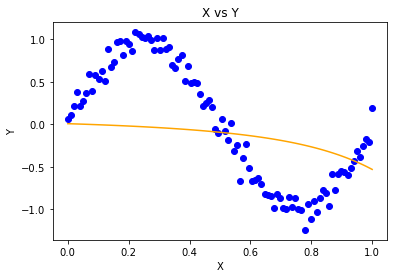

Weights for  1e-05  penalty [ 0.0069167  -0.11168989 -0.10804444 -0.08715273 -0.06710985 -0.05090112
 -0.03832777 -0.02863903 -0.02113172 -0.01525652]
Train Loss for  1e-05  penalty 0.5949220208232016
Test loss for  1e-05  penalty 0.6781750249492742


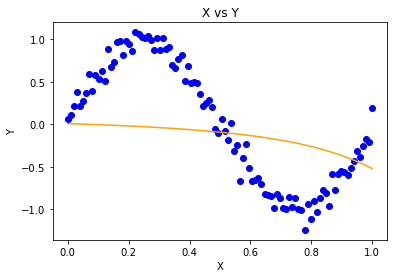

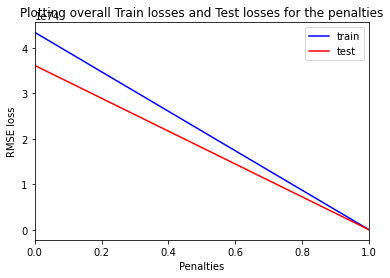

In [23]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
# Univariate Polynomial Regression
 
class PolynomailRegression() :
     
    def __init__( self, degree, learning_rate, iterations, penalty ) :
         
        self.degree = degree
         
        self.learning_rate = learning_rate
         
        self.iterations = iterations
        
        self.penalty=penalty
    # function to transform X
     
    def transform( self, X ) :
         
        # initialize X_transform
         
        X_transform = np.ones( ( self.m, 1 ) )
         
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                 
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
 
        return X_transform  
     

   
         
    # model training
     
    def fit( self, X, Y ) :
         
        self.X = X
     
        self.Y = Y
     
        self.m, self.n = self.X.shape
     
        # weight initialization
        self.train_loss=0
        self.W = np.zeros( self.degree + 1 )
         
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
         
        X_transform = self.transform( self.X )
         
       
                 
        # gradient descent learning
        
        
        
        for i in range( self.iterations ) :
             
            h = self.predict( self.X )
            
            error = (h - self.Y)
           
            
            
            # update weights
            
            self.W = self.W - (self.learning_rate * ( 1 / self.m ) * np.dot( X_transform.T, error ) + (self.penalty/2)*sum(abs(self.W)) )
            
       
        
        train_pred=np.dot(X_transform,self.W)
        self.train_loss=math.sqrt(np.mean((train_pred-Y)**2))
        
        return self.W,self.train_loss 
     
   
        
        
        
    def predict( self, X ) :
      
        # transform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n
        
       # X_transform = self.transform( X )
         
        m, n = X.shape 
        
        X_transform = np.ones( ( m, 1 ) )
        
        j = 0
     
        for j in range( self.degree + 1 ) :
             
            if j != 0 :
                 
                x_pow = np.power( X, j )
                
                # append x_pow to X_transform
                 
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
         
        return np.dot( X_transform, self.W )
       
       
# Driver code    
 
def main() :   
     
    # Create dataset
    n=100
    X = np.sort(np.linspace(0, 1, n))
    N = np.random.normal(0, 1, size=100)
    Y = np.sin(2*np.pi*X)+ N*0.1
    X=X.reshape(-1,1)
    
     
    
    
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.5, random_state=42)
    X_train=X_train.reshape(-1,1)
    X_test=X_test.reshape(-1,1)
  
    # model training
    TrainTracker=[]
    TestTracker=[]
    penalties=[1,0.1,0.01,0.001,0.0001,0.00001]
    for i in penalties:
        model = PolynomailRegression( degree = 9, learning_rate = 0.01, iterations = 100, penalty=i )
    
        W,train_loss=model.fit( X_train, Y_train )
        print("Weights for ",i," penalty",model.W) 
        print("Train Loss for ",i," penalty",model.train_loss)
        # Prediction on training set
        TrainTracker.append(model.train_loss)
        Y_pred = model.predict( X )
   
      
    
        y_predic=model.predict(X_test)
        test_error=y_predic-Y_test
        print("Test loss for ",i," penalty",math.sqrt(np.mean((test_error)**2)))
        TestTracker.append(math.sqrt(np.mean((test_error)**2)))
        plt.scatter( X, Y, color = 'blue' )
    
  
        plt.plot( X, Y_pred, color = 'orange' )
     
        plt.title( 'X vs Y' )
     
        plt.xlabel( 'X' )
     
        plt.ylabel( 'Y' )
     
        plt.show()
    
    
    plt.plot(TrainTracker, label="train" ,color="blue")
    plt.plot(TestTracker, label="test" ,color="red")
    plt.legend()
    plt.title( 'Plotting overall Train losses and Test losses for the penalties' )
    plt.xlabel( 'Penalties' )
    plt.xlim(0,1)
    plt.ylabel( 'RMSE loss' )
    plt.show()
 
if __name__ == "__main__" :
     
    main()